<a href="https://colab.research.google.com/github/leonbenenati/Leon_Lighthouse/blob/main/Leon_Lighthouse_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação inicial


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/wage_train.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

# EDA

Na EDA será analisado as colunas em relação a variavel alvo, que nesse caso é yearly_wage.

Na Variável categóricas será apresentado em forma de histograma, onde terá uma visualização se aquela variável impacta ou não na renda

Para as Variáveis númerica será utilizada o Boxplot para verificar a mediana e como é a disperção dos dados, se há outliers. Também será analisado com yearly_wage

yearly_wage Ganhará uma visualização pois é importanta saber as principais características da váriavel que queremos prever


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Renda**

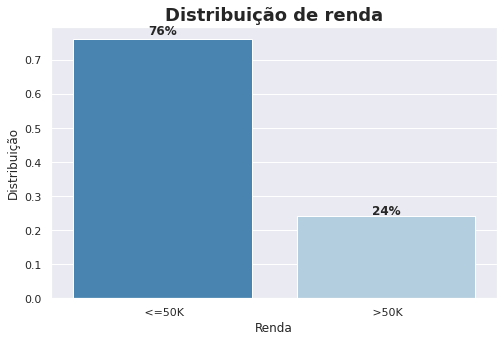

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (8,5))
plt.title('Distribuição de renda', fontsize=18, fontweight='bold')
eda = df['yearly_wage'].value_counts(normalize = True).rename_axis('Renda').reset_index(name = 'Distribuição')

ax = sns.barplot(x = 'Renda', y = 'Distribuição', data = eda.head(10), palette='Blues_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')





*   76% da base ganha menos de 50k
*   24% da base ganha mais de 50k
*   Como esperado a maior parte da base ganha menos de 50k





## Idade

In [ ]:
df["age"].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

[Text(0.5, 0, 'Idade')]

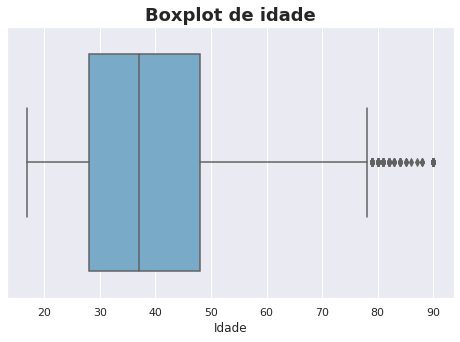

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
plt.title('Boxplot de idade', fontsize=18, fontweight='bold')
ax = sns.boxplot(x=df["age"],palette='Blues_r')
ax.set(xlabel='Idade')



*   Mediana é 37 é a média é 38,58
*   O primeiro quartil está em 25 e o terceiro em 48
*   Mínimo é 17. Máximo é 90





[Text(0, 0.5, 'Renda'), Text(0.5, 0, 'Idade')]

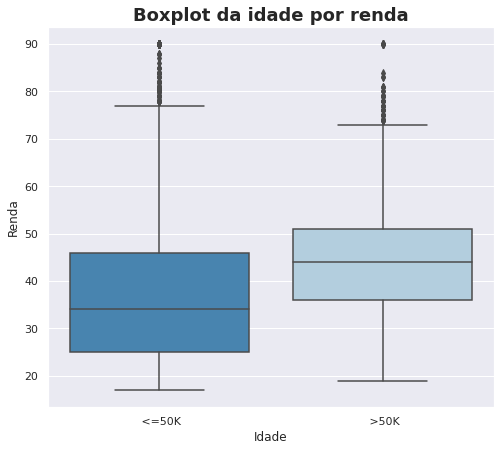

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,7))
plt.title('Boxplot da idade por renda', fontsize=18, fontweight='bold')
ax = sns.boxplot(x=df["yearly_wage"],y=df['age'],palette='Blues_r')
ax.set(xlabel='Idade', ylabel="Renda")



*   A médiana/média de quem ganha mais de 50 mil é maior de quem ganha menos de 50 mil





## Trabalho

In [ ]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

[Text(0.5, 20.200000000000003, 'Trabalho')]

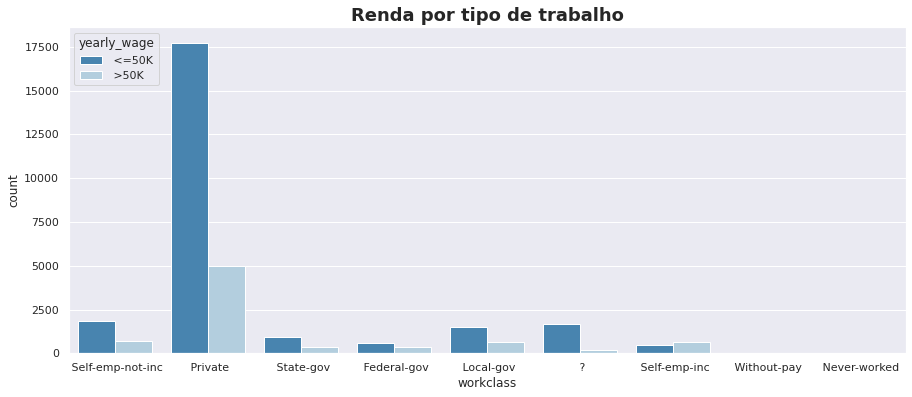

In [ ]:
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
order_list = [' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked']

sns.countplot(x=df['workclass'], hue= df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por tipo de trabalho', fontsize=18, fontweight='bold')





*   A maior parte da base trabalha no setor privado, onde cerca 17500 ganha menos de 50k e cerca de 5000 ganha menos de 50k.   
*   Parte da base não tem informação, está com ponto de interrogação, precisará ser analisado esse dado se sofrer impacto na predição.












/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


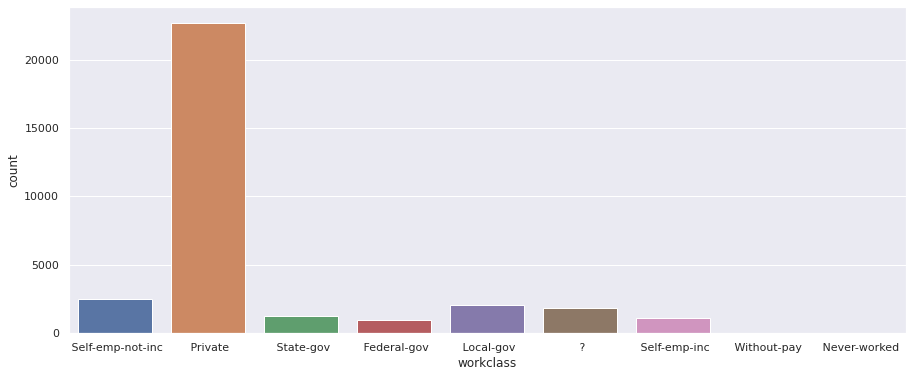

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['workclass'],label="Count")

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64




*   Without-pay e Never-worked tem juntos 21 pesssoas na base




## Educação

In [ ]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

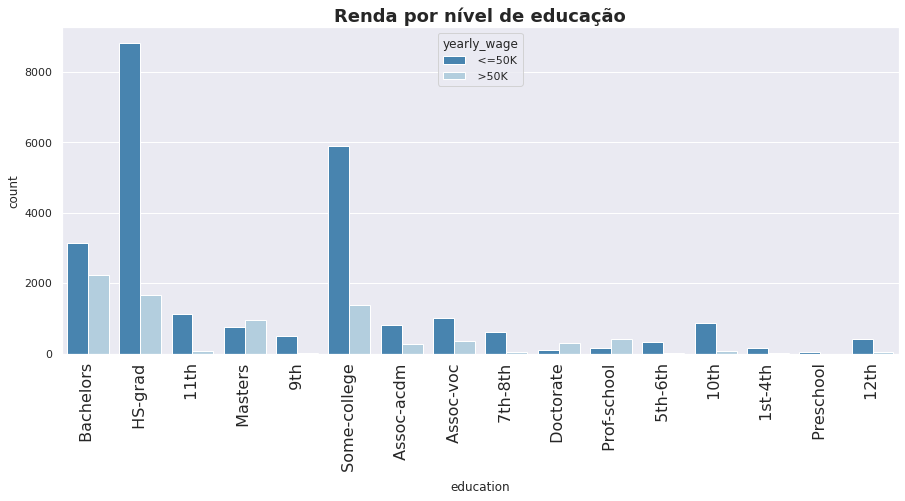

In [ ]:
plt.figure(figsize=(15,6))
order_list = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th']
sns.countplot(df['education'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por nível de educação', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)



*   Entre quem tem o ensino (HS-grad) o número de quem ganha menos de 50k é muito maior do que quem ganha mais de 50k
*   Entre quem é Bacharel (Bachelors) a o número de quem ganha menos de 50k é um pouco maior do que quem ganha mais de 50k
*   Entre quem é mestre (Masters) a o número de quem ganha menos de 50k é menor do que quem ganha mais de 50k





## Estado Civil

In [ ]:
df['marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

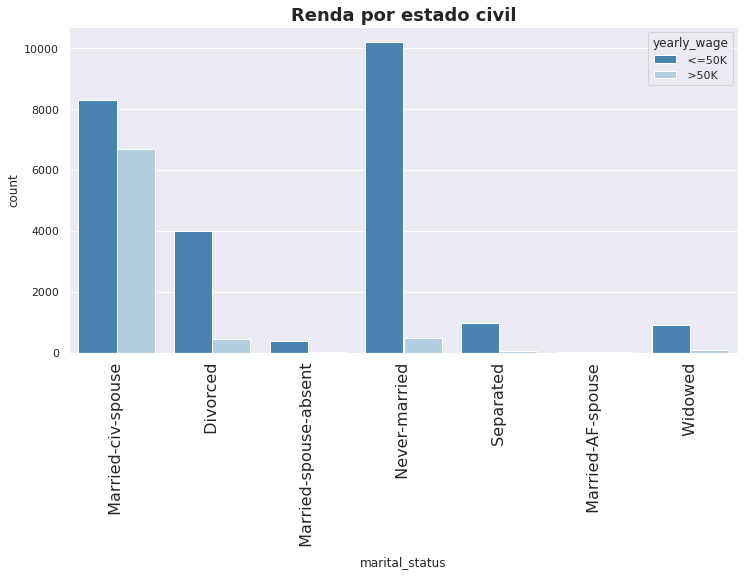

In [ ]:
plt.figure(figsize=(12,6))
order_list = [' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed']
sns.countplot(df['marital_status'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por estado civil', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)



*   Entre quem nunca casou a quantidade de quem ganha menos de 50k é muitor de quem ganha mais de 50k.
*   A maior parte de quem ganha mais de 50k está casado.



## Ocupação

In [ ]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

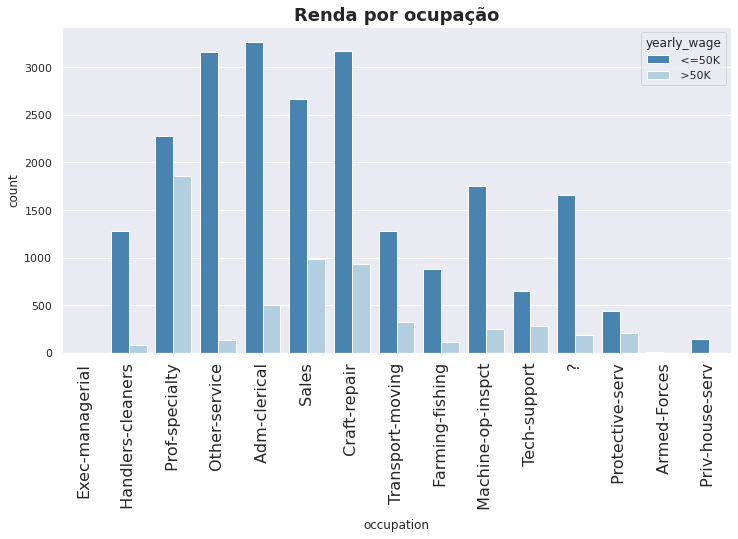

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']
sns.countplot(df['occupation'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por ocupação', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)



*   Especialistas a proporção de quem ganha menos é um pouco maior 
*   Vendas e Conserto de artesanato tem a segunda e terceiro maior quantidade de pessoas que ganham mais de 50k mas tem grande quantidade que ganha menos de 50
* nenhuma ocupação apresenta quantidade de pessoas que ganham 50k maior do que ganha menos
* Tem dados sem informação apenas com ponto de interrogação, será necessário analisar se impactar na predição



## Relacionamento 

In [ ]:
df["relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Renda por relacionamento')

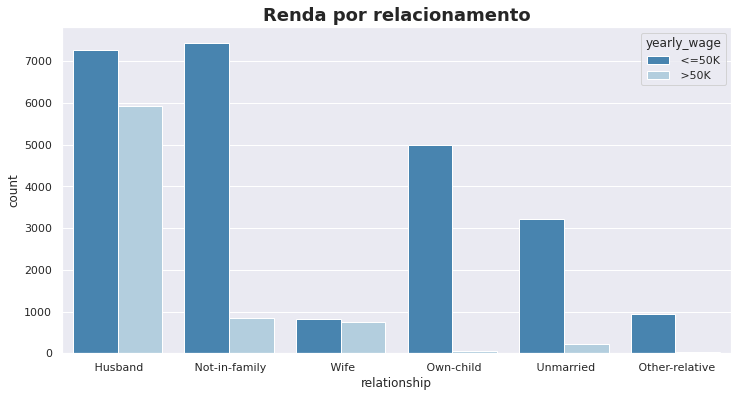

In [ ]:
plt.figure(figsize=(12,6))
order_list = [' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']
sns.countplot(df['relationship'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por relacionamento', fontsize=18, fontweight='bold')



*   Entre as esposas a proporção é quase igual
*   Entre os maridos a proporção de quem ganha menos de 50k é maior
*   Entre os não casados apenas alguns ganha mais de 50k



## Sexo

In [ ]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Renda por relacionamento')

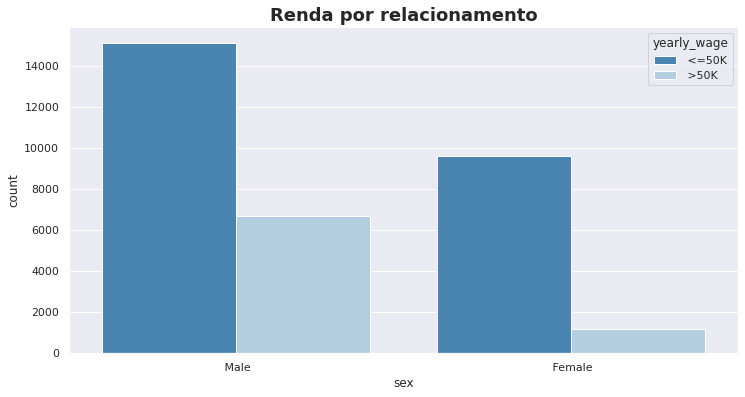

In [ ]:
plt.figure(figsize=(12,6))
order_list = [' Male', ' Female']
sns.countplot(df['sex'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por sexo', fontsize=18, fontweight='bold')



*   Tem mais Homens do que mulheres
*   A proporção de homens que ganham mais de 50k é maior do que mulheres. Cerca de 35% para homens e 10% para mulheres



## Raça

In [ ]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Renda por raça')

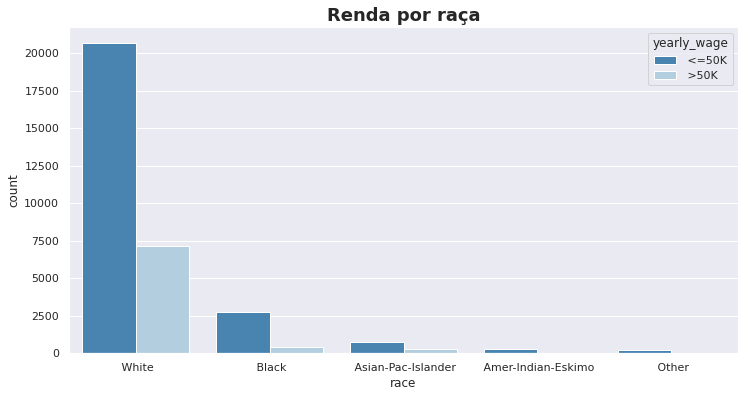

In [ ]:
plt.figure(figsize=(12,6))
order_list = [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']
sns.countplot(df['race'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por raça', fontsize=18, fontweight='bold')





*   Pessoas brancas tem maior proporção de quem ganha mais de 50k






## País nativo

In [ ]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
def auxiliar(x):
    if x ==' United-States':
        return 'eua'
    else:
        return 'outros'

df['native_country'] = df['native_country'].apply(auxiliar)
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,eua,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,eua,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,eua,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,outros,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,eua,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Renda por país')

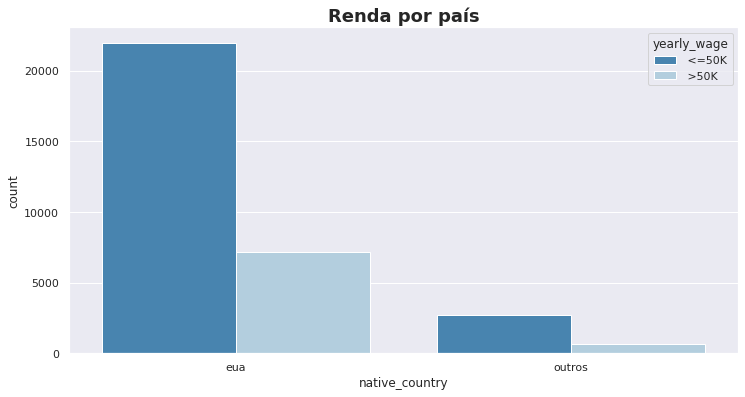

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['eua', 'outros']
sns.countplot(df['native_country'], hue = df['yearly_wage'], palette='Blues_r', order= order_list)
plt.title('Renda por país', fontsize=18, fontweight='bold')



*   Tem muitos países alguns com algunas unidades na base, como a base é Americana a coluna terá dois valores, se a pessoa é nativa do EUA ou não
*   Pessoas do EUA tem maior proporção de quem ganha mais de 50k comparado com outros países, como a base é do EUA, outros países são imigrantes, esperado que imigrantes ganhem menos do que nativos





## Horas por semana

In [ ]:
df["hours_per_week"].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [ ]:
df["hours_per_week"].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

[Text(0.5, 0, 'Horas')]

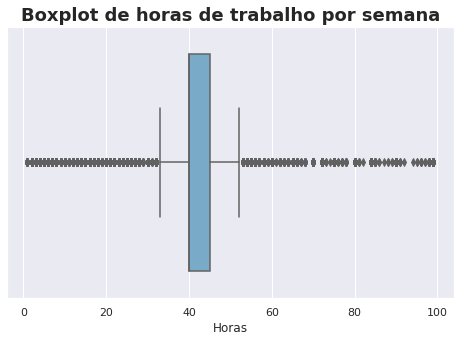

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
plt.title('Boxplot de horas de trabalho por semana', fontsize=18, fontweight='bold')
ax = sns.boxplot(x=df["hours_per_week"],palette='Blues_r')
ax.set(xlabel='Horas')



*   Mediana é 40 é a média é 40,43
*   O primeiro quartil está em 25 e o terceiro em 45
*   Mínimo é 1. Máximo é 99
*   A disperção é muito grande



## Ganhos e perda de capital

In [ ]:
df["capital_gain"].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [ ]:
df["capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

[Text(0.5, 0, 'ganhos de capital')]

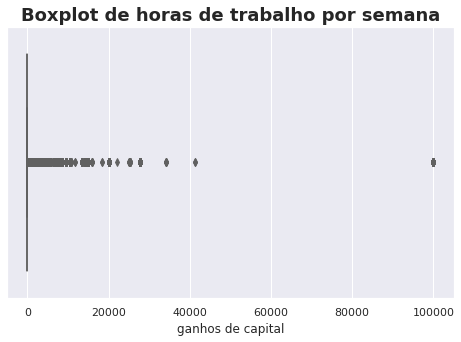

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
plt.title('Boxplot de horas de trabalho por semana', fontsize=18, fontweight='bold')
ax = sns.boxplot(x=df["capital_gain"],palette='Blues_r')
ax.set(xlabel='ganhos de capital')

In [ ]:
df["capital_loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [ ]:
df["capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

[Text(0.5, 0, 'ganhos de capital')]

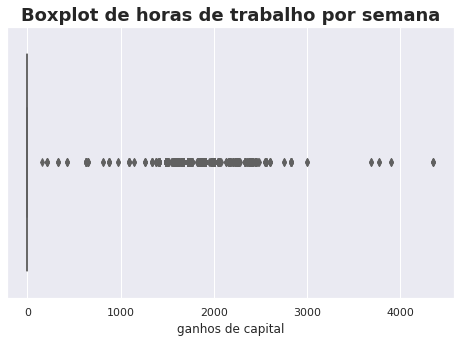

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
plt.title('Boxplot de horas de trabalho por semana', fontsize=18, fontweight='bold')
ax = sns.boxplot(x=df["capital_loss"],palette='Blues_r')
ax.set(xlabel='perda de capital')




*   Ganhos e perda de capital tem grande disperção
*   As duas tem características de ter valores 0 e maior que zero
*   Pode ser criado uma váriavel do tipo dummy, se a pessoa tem perda/ganho de capital ou não, para ajustar no modelo










## Correlação 

In [ ]:
df = pd.read_csv("/content/wage_train.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.corr(method ='pearson')

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Unnamed: 0,1.000000,0.001288,-0.003210,-0.001019,0.001680,-0.001200,0.000605
age,0.001288,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.003210,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education_num,-0.001019,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital_gain,0.001680,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital_loss,-0.001200,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours_per_week,0.000605,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


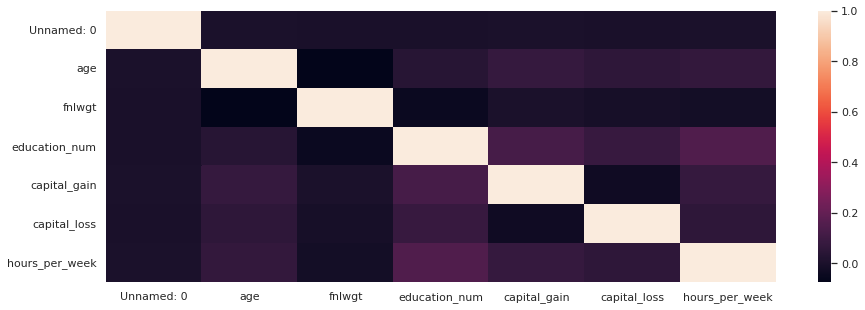

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
ax = sns.heatmap(df.corr()) 



*   As Variáveis númericas não apresentam alta correlação



# Considerações finais 



*   As váriaveis mostraram que geram impacto no salário 
*   fnlwgt não foi analisado pois se trata do número de pessoas que essa pessoa representa na população
*   education_num representa a mesma coisa da education, mas em vez de escrever a educação da pessoa a coluna númera em ordem crescente, onde quanto maior o número, maior o grau de instrução





